# Problema:

Um time da Indicium que está trabalhando atualmente junto a um cliente no processo de criação de uma plataforma de aluguéis temporários na cidade de Nova York. Para o desenvolvimento de sua estratégia de precificação, **pediu** para que a Indicium fizesse uma **análise exploratória dos dados de seu maior concorrente**, assim como um **teste de validação de um modelo preditivo**.

Seu objetivo é desenvolver um **modelo de previsão de preços** a partir do dataset oferecido, e avaliar tal modelo utilizando as métricas de avaliação que mais fazem sentido para o problema. O uso de outras fontes de dados além do dataset é permitido (e encorajado).

**Entregas**


1.   Faça uma análise exploratória dos dados (EDA), demonstrando as principais características entre as variáveis e apresentando algumas hipóteses de negócio relacionadas. Seja criativo!
2.   Responda também às seguintes perguntas:
  *   Supondo que uma pessoa esteja pensando em investir em um apartamento para alugar na plataforma, onde seria mais indicada a compra?

  *   O número mínimo de noites e a disponibilidade ao longo do ano interferem no preço?

  *   Existe algum padrão no texto do nome do local para lugares de mais alto valor?



3.   Explique como você faria a previsão do preço a partir dos dados. Quais variáveis e/ou suas transformações você utilizou e por quê? Qual tipo de problema estamos resolvendo (regressão, classificação)? Qual modelo melhor se aproxima dos dados e quais seus prós e contras? Qual medida de performance do modelo foi escolhida e por quê?

4.   Supondo um apartamento com as seguintes características:


```
{'id': 2595,
 'nome': 'Skylit Midtown Castle',
 'host_id': 2845,
 'host_name': 'Jennifer',
 'bairro_group': 'Manhattan',
 'bairro': 'Midtown',
 'latitude': 40.75362,
 'longitude': -73.98377,
 'room_type': 'Entire home/apt',
 'minimo_noites': 1,
 'numero_de_reviews': 45,
 'ultima_review': '2019-05-21',
 'reviews_por_mes': 0.38,
 'calculado_host_listings_count': 2,
 'disponibilidade_365': 355}

```

  *   Qual seria a sua sugestão de preço?


5.   Salve o modelo desenvolvido no formato .pkl.

6.   A entrega deve ser feita através de um repositório de código público que contenha:
  *   README explicando como instalar e executar o projeto
  *   Arquivo de requisitos com todos os pacotes utilizados e suas versões
  *   Relatórios das análises estatísticas e EDA em PDF, Jupyter Notebook ou semelhante conforme passo 1 e 2.
  *   Códigos de modelagem utilizados no passo 3 (pode ser entregue no mesmo Jupyter Notebook).
  *   Arquivo .pkl conforme passo 5 acima.
7.   Um vídeo curto explicando o desenvolvimento de suas entregas deste desafio, como você planejou e executou as atividades propostas. O vídeo deverá ser entregue via link via Google Drive. Lembre-se de autorizar o acesso para "qualquer pessoa com o link".
























## Dicionário dos dados

**id** – Atua como uma chave exclusiva para cada anúncio nos dados do aplicativo

**nome** - Representa o nome do anúncio

**host_id** - Representa o id do usuário que hospedou o anúncio

**host_name** – Contém o nome do usuário que hospedou o anúncio

**bairro_group** - Contém o nome do bairro onde o anúncio está localizado

**bairro** - Contém o nome da área onde o anúncio está localizado

**latitude** - Contém a latitude do local

**longitude** - Contém a longitude do local

**room_type** – Contém o tipo de espaço de cada anúncio

**price** - Contém o preço por noite em dólares listado pelo anfitrião

**minimo_noites** - Contém o número mínimo de noites que o usuário deve reservar

**numero_de_reviews** - Contém o número de comentários dados a cada listagem

**ultima_review** - Contém a data da última revisão dada à listagem

**reviews_por_mes** - Contém o número de avaliações fornecidas por mês

**calculado_host_listings_count** - Contém a quantidade de listagem por host

**disponibilidade_365** - Contém o número de dias em que o anúncio está disponível para reserva


## Tipos de Variáveis

### Quantitativa

latitude - Contém a latitude do local

longitude - Contém a longitude do local

price - Contém o preço por noite em dólares listado pelo anfitrião

minimo_noites - Contém o número mínimo de noites que o usuário deve reservar

numero_de_reviews - Contém o número de comentários dados a cada listagem

ultima_review - Contém a data da última revisão dada à listagem

reviews_por_mes - Contém o número de avaliações fornecidas por mês

calculado_host_listings_count - Contém a quantidade de listagem por host

disponibilidade_365 - Contém o número de dias em que o anúncio está disponível para reserva

### Qualitativa

nome - Representa o nome do anúncio

host_name – Contém o nome do usuário que hospedou o anúncio

bairro_group - Contém o nome do bairro onde o anúncio está localizado

bairro - Contém o nome da área onde o anúncio está localizado

room_type – Contém o tipo de espaço de cada anúncio

## Importando Bibliotecas e Dataset

### Importando o pandas para leitura do dataset

In [10]:
import pandas as pd

#### Importando Seaborn, Plotly, Matplotlib para visualização e gráficos

In [11]:
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.figure_factory as ff

#### Importando numpy para operações matemáticas

In [13]:
import numpy as np

#### Biblioteca para o test split

In [14]:
from sklearn.model_selection import train_test_split

#### Importanto o Dataset

In [15]:
df = pd.read_csv('dataset/teste_indicium_precificacao.csv')

# Análise Exploratória dos Dados (EDA)

In [16]:
df.head()

id                                              nome  host_id  \
0  2595                             Skylit Midtown Castle     2845   
1  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
2  3831                   Cozy Entire Floor of Brownstone     4869   
3  5022  Entire Apt: Spacious Studio/Loft by central park     7192   
4  5099         Large Cozy 1 BR Apartment In Midtown East     7322   

     host_name bairro_group        bairro  latitude  longitude  \
0     Jennifer    Manhattan       Midtown  40.75362  -73.98377   
1    Elisabeth    Manhattan        Harlem  40.80902  -73.94190   
2  LisaRoxanne     Brooklyn  Clinton Hill  40.68514  -73.95976   
3        Laura    Manhattan   East Harlem  40.79851  -73.94399   
4        Chris    Manhattan   Murray Hill  40.74767  -73.97500   

         room_type  price  minimo_noites  numero_de_reviews ultima_review  \
0  Entire home/apt    225              1                 45    2019-05-21   
1     Private room    150              3                  0           NaN   
2  Entire home/apt     89              1                270    2019-07-05   
3  Entire home/apt     80             10                  9    2018-11-19   
4  Entire home/apt    200              3                 74    2019-06-22   

   reviews_por_mes  calculado_host_listings_count  disponibilidade_365  
0             0.38                              2                  355  
1              NaN                              1                  365  
2             4.64                              1                  194  
3             0.10                              1                    0  
4             0.59                              1                  129

### Tratando os dados

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48878 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48873 non-null  object 
 4   bairro_group                   48894 non-null  object 
 5   bairro                         48894 non-null  object 
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  object 
 9   price                          48894 non-null  int64  
 10  minimo_noites                  48894 non-null  int64  
 11  numero_de_reviews              48894 non-null  int64  
 12  ultima_review                  38842 non-null 

##### Convertendo o tipo do **ultima_review** de object para datetime, para facilitar a manipulação dos dados

In [18]:
df['ultima_review'] = pd.to_datetime(df['ultima_review'])

#### Removendo as seguntes colunas= **id** e **host_id**
Por ser insignificante para o modelo de previsão

In [19]:
df = df.drop("id", axis = 1)

In [20]:
df = df.drop("host_id", axis = 1)

#### Descrição dos dados

In [21]:
df.describe()

latitude     longitude         price  minimo_noites  \
count  48894.000000  48894.000000  48894.000000   48894.000000   
mean      40.728951    -73.952169    152.720763       7.030085   
min       40.499790    -74.244420      0.000000       1.000000   
25%       40.690100    -73.983070     69.000000       1.000000   
50%       40.723075    -73.955680    106.000000       3.000000   
75%       40.763117    -73.936273    175.000000       5.000000   
max       40.913060    -73.712990  10000.000000    1250.000000   
std        0.054529      0.046157    240.156625      20.510741   

       numero_de_reviews                  ultima_review  reviews_por_mes  \
count       48894.000000                          38842     38842.000000   
mean           23.274758  2018-10-04 01:46:50.710055936         1.373251   
min             0.000000            2011-03-28 00:00:00         0.010000   
25%             1.000000            2018-07-08 00:00:00         0.190000   
50%             5.000000            2019-05-19 00:00:00         0.720000   
75%            24.000000            2019-06-23 00:00:00         2.020000   
max           629.000000            2019-07-08 00:00:00        58.500000   
std            44.550991                            NaN         1.680453   

       calculado_host_listings_count  disponibilidade_365  
count                   48894.000000         48894.000000  
mean                        7.144005           112.776169  
min                         1.000000             0.000000  
25%                         1.000000             0.000000  
50%                         1.000000            45.000000  
75%                         2.000000           227.000000  
max                       327.000000           365.000000  
std                        32.952855           131.618692

In [22]:
df.isnull().sum()

nome                                16
host_name                           21
bairro_group                         0
bairro                               0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimo_noites                        0
numero_de_reviews                    0
ultima_review                    10052
reviews_por_mes                  10052
calculado_host_listings_count        0
disponibilidade_365                  0
dtype: int64

#### **Tratando dados Nulos**

#### Subistituindo pela média as linhas nulas da coluna = **ultima_review**;


In [24]:
df['ultima_review'] = df['ultima_review'].fillna(df['ultima_review'].mean())
#df = df.dropna(subset=['ultima_review'], axis=0)

#### Subistituindo pela média as linhas nulas da coluna = **reviews_por_mes**;

In [25]:
df['reviews_por_mes'] = df['reviews_por_mes'].fillna(df['reviews_por_mes'].mean())

#### Subistituindo por "Nenhum" as linhas nulas da coluna = **nome**;

In [26]:
df['nome'] = df['nome'].replace(np.nan, 'Nenhum')

#### Subistituindo por "Nenhum" as linhas nulas da coluna = **host_name**;

In [27]:
df['host_name'] = df['host_name'].replace(np.nan, 'Nenhum')

#### Verificando total de linhas e colunas

In [28]:
df.shape

(48894, 14)

O dataset contém **48894 Linhas e 14 Colunas**

In [29]:
df.isnull().sum()

nome                             0
host_name                        0
bairro_group                     0
bairro                           0
latitude                         0
longitude                        0
room_type                        0
price                            0
minimo_noites                    0
numero_de_reviews                0
ultima_review                    0
reviews_por_mes                  0
calculado_host_listings_count    0
disponibilidade_365              0
dtype: int64

Problema dos **nulos** resolvido.

#### Valores Unicos

In [30]:
df.nunique()

nome                             47905
host_name                        11453
bairro_group                         5
bairro                             221
latitude                         19048
longitude                        14718
room_type                            3
price                              674
minimo_noites                      109
numero_de_reviews                  394
ultima_review                     1765
reviews_por_mes                    938
calculado_host_listings_count       47
disponibilidade_365                366
dtype: int64

### Quantidades de ***Tipos de Quartos***

In [31]:
df['room_type'].value_counts()

room_type
Entire home/apt    25409
Private room       22325
Shared room         1160
Name: count, dtype: int64

In [47]:
fig=px.histogram(df,x='room_type', barmode="group",color='room_type', color_discrete_sequence=['white','#4A235A','#C39BD3'], text_auto=True)
fig.update_layout(title='<b>Quantidades de Tipos de Quartos</b>',
                 title_font={'size':18},
                 paper_bgcolor='#EBDEF0',
                 plot_bgcolor='#EBDEF0',
                 showlegend=True,
                 width=1000,
                 height=600)
fig.update_yaxes(showgrid=False)

fig.show()

### Média de ***preço*** pelo ***Tipo de Quarto***

In [34]:
quarto_preco = df.groupby('room_type')['price'].mean().reset_index().sort_values(by = 'price', ascending = False)
quarto_preco

room_type       price
0  Entire home/apt  211.794246
1     Private room   89.778320
2      Shared room   70.127586

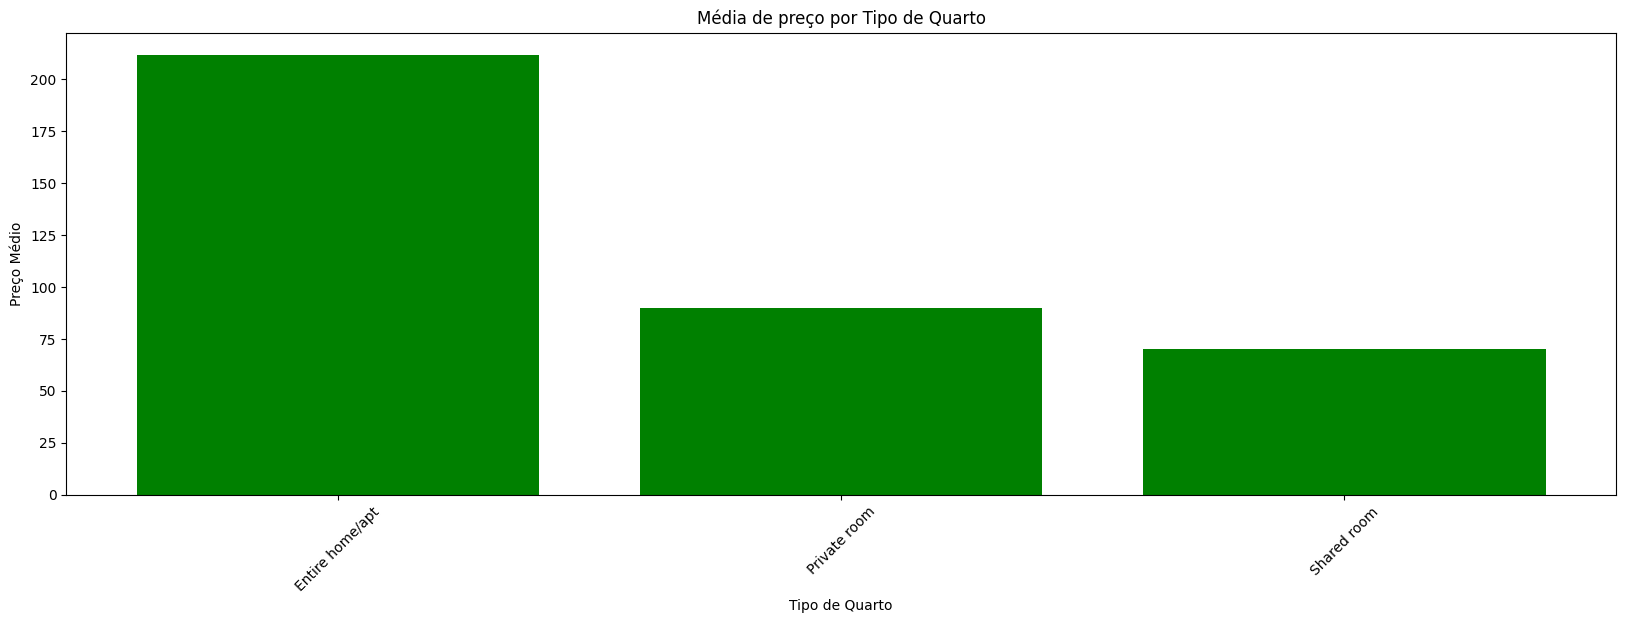

In [35]:
plt.figure(figsize = (20, 6))
plt.bar(quarto_preco['room_type'], quarto_preco['price'], color='green')
plt.title('Média de preço por Tipo de Quarto')
plt.xlabel('Tipo de Quarto')
plt.ylabel('Preço Médio')
plt.xticks(rotation=45)
plt.show()

### Média de ***preço*** por ***Grupo de Bairro***

In [36]:
bairrogp_price = df.groupby('bairro_group')['price'].mean().reset_index().sort_values(by = 'price', ascending = False)
bairrogp_price

bairro_group       price
2      Manhattan  196.875814
1       Brooklyn  124.381983
4  Staten Island  114.812332
3         Queens   99.517649
0          Bronx   87.496792

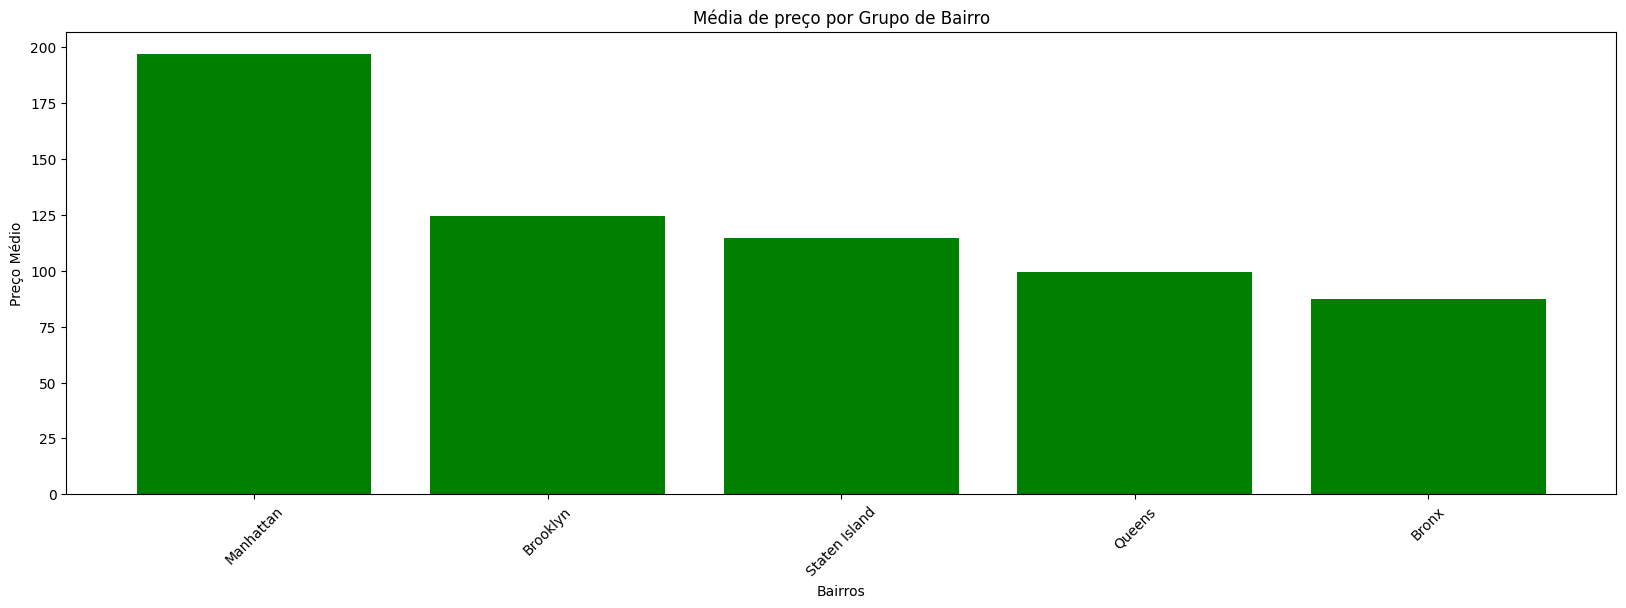

In [37]:
plt.figure(figsize = (20, 6))
plt.bar(bairrogp_price['bairro_group'], bairrogp_price['price'], color='green')
plt.title('Média de preço por Grupo de Bairro')
plt.xlabel('Bairros')
plt.ylabel('Preço Médio')
plt.xticks(rotation=45)
plt.show()

### Média de ***preço*** pelos top 10 ***Bairro***

In [38]:
bairro_price = df.groupby('bairro')['price'].mean().reset_index().sort_values(by = 'price', ascending = False).head(10)

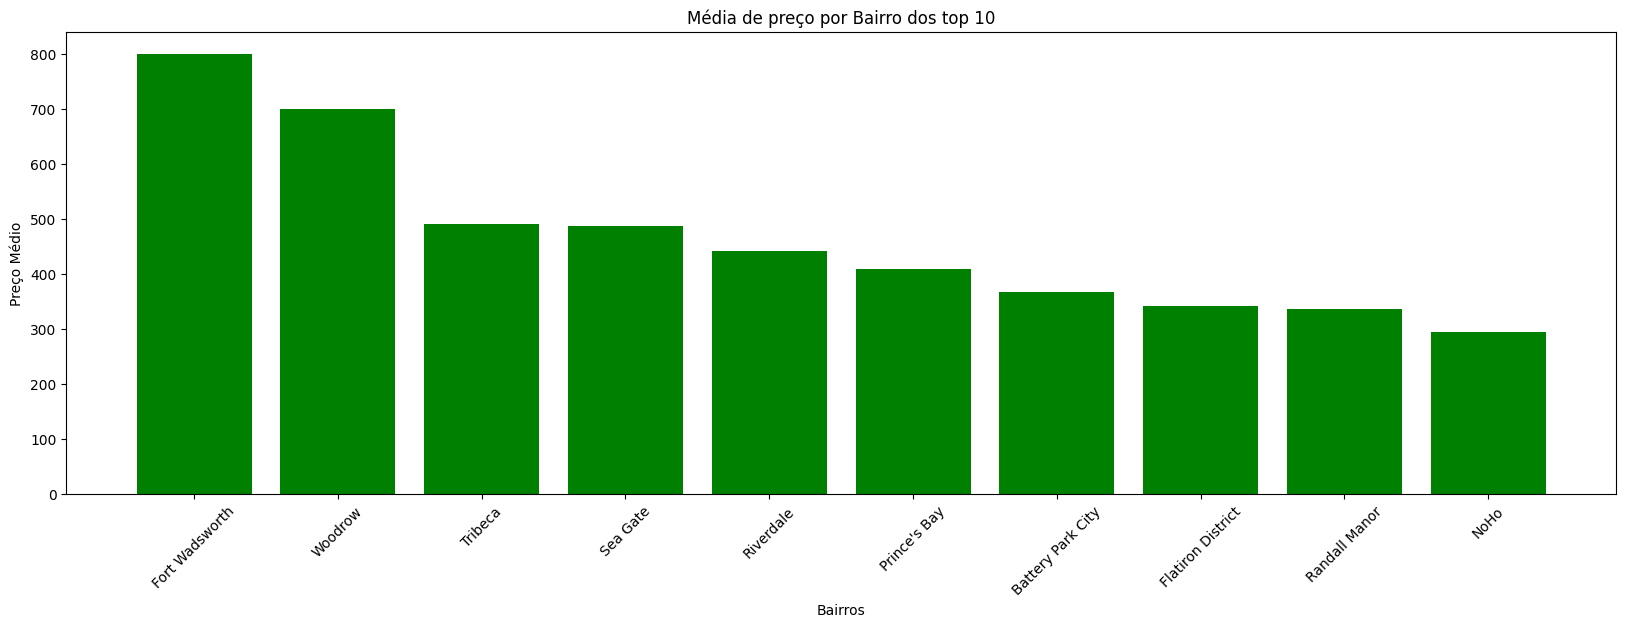

In [39]:
# Plot
plt.figure(figsize = (20, 6))
plt.bar(bairro_price['bairro'], bairro_price['price'], color='green')
plt.title('Média de preço por Bairro dos top 10')
plt.xlabel('Bairros')
plt.ylabel('Preço Médio')
plt.xticks(rotation=45)
plt.show()

In [40]:
df.groupby('room_type')['numero_de_reviews'].mean()

room_type
Entire home/apt    22.842418
Private room       24.113639
Shared room        16.600000
Name: numero_de_reviews, dtype: float64

### A relação entre (Tipo de quarto, Grupo de Bairro e a Quantidade de Tipo de Quartos)

In [41]:
qt_quartos_bairrogp = df.groupby('room_type')['bairro_group'].value_counts().reset_index().sort_values(by = 'room_type', ascending = False)
qt_quartos_bairrogp


room_type   bairro_group  count
10      Shared room      Manhattan    480
11      Shared room       Brooklyn    413
12      Shared room         Queens    198
13      Shared room          Bronx     60
14      Shared room  Staten Island      9
5      Private room       Brooklyn  10131
6      Private room      Manhattan   7982
7      Private room         Queens   3372
8      Private room          Bronx    652
9      Private room  Staten Island    188
0   Entire home/apt      Manhattan  13199
1   Entire home/apt       Brooklyn   9559
2   Entire home/apt         Queens   2096
3   Entire home/apt          Bronx    379
4   Entire home/apt  Staten Island    176

In [51]:
fig=px.scatter_3d(qt_quartos_bairrogp,x='room_type',y='bairro_group',z='count',color='room_type',width=1000,height=900, color_discrete_sequence=['white','#4A235A','#C39BD3'])
fig.update_layout(title='<b>A relação entre (Tipo de quarto, Grupo de Bairro e a Quantidade de Tipo de Quartos)</b>',title_font={'size': 20,'family': 'Serif'},showlegend=True)


fig.show()

In [ ]:
fig=px.scatter_3d(df,x='room_type',y='bairro_group',z='price',color='room_type',width=1000,height=900, color_discrete_sequence=['white','#4A235A','#C39BD3'])
fig.update_layout(title='<b>A relação entre (Tipo de quarto, preço e o Grupo de Bairro)</b>',title_font={'size': 20,'family': 'Serif'},showlegend=True)

fig.show()

# Supondo que uma pessoa esteja pensando em investir em um apartamento para alugar na plataforma, onde seria mais indicada a compra?

In [53]:
apts = df.loc[df['room_type'] == 'Entire home/apt', ['bairro','bairro_group','price']].sort_values(by = 'price', ascending = False)
apts

bairro bairro_group  price
29237     Upper West Side    Manhattan  10000
17691          Greenpoint     Brooklyn  10000
6529          East Harlem    Manhattan   9999
40432     Lower East Side    Manhattan   9999
30267             Tribeca    Manhattan   8500
...                   ...          ...    ...
35600  Bedford-Stuyvesant     Brooklyn     10
2859         East Village    Manhattan     10
32809         Sunset Park     Brooklyn     10
25777        Williamsburg     Brooklyn      0
26258         Murray Hill    Manhattan      0

[25409 rows x 3 columns]

In [54]:
apts.groupby(['bairro_group','bairro'])['price'].mean().reset_index().sort_values(by = 'price', ascending = False)


bairro_group          bairro       price
183  Staten Island  Fort Wadsworth  800.000000
215  Staten Island         Woodrow  700.000000
200  Staten Island   Randall Manor  651.000000
86        Brooklyn        Sea Gate  649.400000
119      Manhattan         Tribeca  561.818182
..             ...             ...         ...
185  Staten Island      Grant City   71.750000
34           Bronx       Soundview   70.000000
45           Bronx        Woodlawn   65.500000
182  Staten Island    Emerson Hill   63.500000
194  Staten Island        New Dorp   57.000000

[216 rows x 3 columns]

Recomendaria em Staten Island por conta de ter a média alta de valor

# O número mínimo de noites e a disponibilidade ao longo do ano interferem no preço

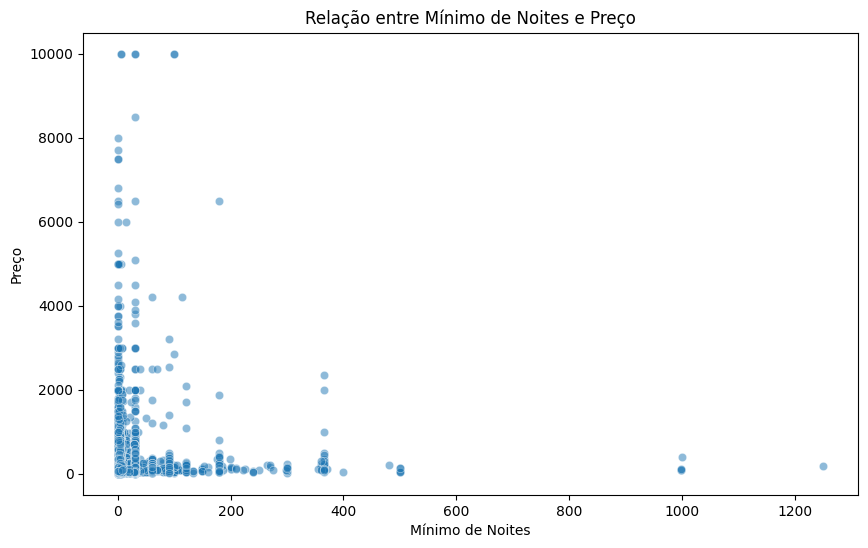

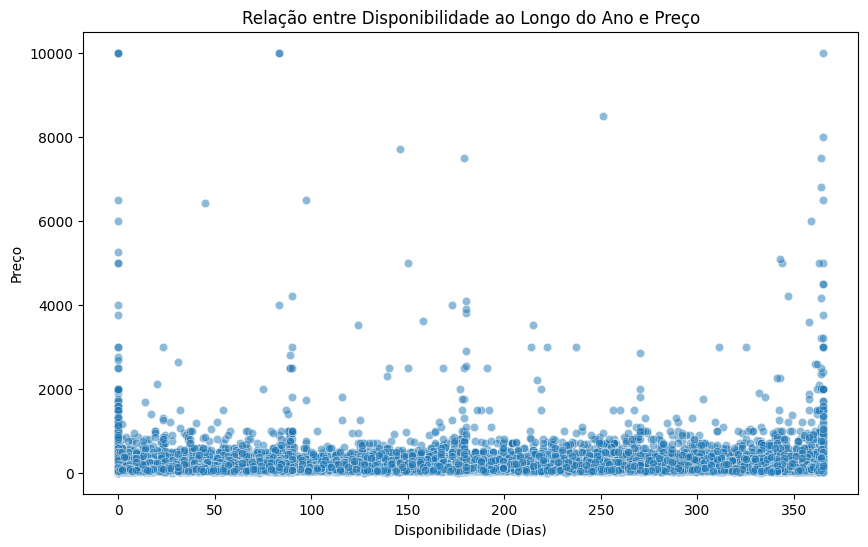

In [55]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='minimo_noites', y='price', data=df, alpha=0.5)
plt.title('Relação entre Mínimo de Noites e Preço')
plt.xlabel('Mínimo de Noites')
plt.ylabel('Preço')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='disponibilidade_365', y='price', data=df, alpha=0.5)
plt.title('Relação entre Disponibilidade ao Longo do Ano e Preço')
plt.xlabel('Disponibilidade (Dias)')
plt.ylabel('Preço')
plt.show()


In [56]:
fig=px.scatter_3d(df,x='minimo_noites',y='disponibilidade_365',z='price',color='room_type',width=1000,height=900, color_discrete_sequence=['white','#4A235A','#C39BD3'])
fig.update_layout(title='<b>A relação entre (Número mínimo de noites e disponibilidade ao longo do ano sobre preço)</b>',title_font={'size': 20,'family': 'Serif'},showlegend=True)



fig.show()

Existe uma relação entre o **número mínimo de noites** e a **disponibilidade ao longo do ano** interferem no **preço**, porém a variância do preço é realçada pelo **número mínimo de noites**, a **disponibilidade ao longo do ano** não apresenta muita variancia.

# Existe algum padrão no texto do nome do local para lugares de mais alto valor?

Primeiro criei um dataset filtrado com os 50 mais caros em ordem decrescente, com nome e preço.

In [57]:
df_nomes = df[['nome', 'price']].sort_values(by = 'price', ascending = False).head(50)
df_nomes

nome  price
17691    Luxury 1 bedroom apt. -stunning Manhattan views  10000
29237                                1-BR Lincoln Center  10000
9150                 Furnished room in Astoria apartment  10000
6529                                  Spanish Harlem Apt   9999
40432  2br - The Heart of NYC: Manhattans Lower East ...   9999
12341                Quiet, Clean, Lit @ LES & Chinatown   9999
30267  Beautiful/Spacious 1 bed luxury flat-TriBeCa/Soho   8500
4376                                       Film Location   8000
29661          East 72nd Townhouse by (Hidden by Airbnb)   7703
42522                70' Luxury MotorYacht on the Hudson   7500
45665                               Gem of east Flatbush   7500
44033                   3000 sq ft daylight photo studio   6800
48042       Luxury TriBeCa Apartment at an amazing price   6500
37193               Apartment New York \nHell’s Kitchens   6500
3773                    SUPER BOWL Brooklyn Duplex Apt!!   6500
29663          Park Avenue Mansion by (Hidden by Airbnb)   6419
3536                  UWS 1BR w/backyard + block from CP   6000
15559                 Luxury townhouse Greenwich Village   6000
3719                 SuperBowl Penthouse Loft 3,000 sqft   5250
43008    Midtown Manhattan great location (Gramacy park)   5100
26738                                         Broadway 1   5000
25824                                           Fulton 2   5000
4344                    NearWilliamsburg bridge 11211 BK   5000
22352                            Victorian Film location   5000
2697                 Beautiful 1 Bedroom in Nolita/Soho    5000
37999      4-Floor Unique Event Space 50P Cap. - #10299B   5000
4375                                Photography Location   4500
46613                     Northside Williamsburg Stunner   4500
43669   Beautiful private Brooklyn room with kitchenette   4200
45866        bay ridge & sunset park furnished apartment   4200
28946   Chelsea Gallery for events, exhibitions, fashion   4160
42735  30 days minimum Time square West Midtown apart...   4100
1861                    Sunny, Family-Friendly 2 Bedroom   4000
3694                 NYC SuperBowl Wk 5 Bdrs River View    4000
21820  The Otheroom Bar/Event/Filming Space -read det...   4000
25900    Greenwich Village Townhome with Private Garden!   3900
17664        VIP Duplex Townhouse with Private Garden!!!   3800
34850             A Night at Anchor Aboard Yacht Ventura   3750
3787                  Prime NYC Location for Super Bowl    3750
42541             West 84th Street by (Hidden by Airbnb)   3613
37863                 NYC HOLIDAY!!!!   April 15- May 15   3600
29662          East 7th Street III by (Hidden by Airbnb)   3518
41215             West 88th Street by (Hidden by Airbnb)   3512
28945   Chelsea Gallery Space for events and exhibitions   3210
39242     Furnished 1000sq large 2bed + office in Harlem   3200
18631  Breathtaking City Views 3 Bed Apt. in Lincoln Sq!   3000
945                     Beautiful 3 bedroom in Manhattan   3000
38357          Massive Loft in the Heart of Union square   3000
39845                                       CQ 1 Bedroom   3000
38222    Luxury West Village private Townhouse 5B Garden   3000

#### Limpando os caracteres especiais e os colocando em minusculo

In [58]:
df_nomes['nome'] = df_nomes['nome'].str.lower().str.replace(r'[^a-z0-9\s]', '', regex=True)
df_nomes

nome  price
17691      luxury 1 bedroom apt stunning manhattan views  10000
29237                                 1br lincoln center  10000
9150                 furnished room in astoria apartment  10000
6529                                  spanish harlem apt   9999
40432   2br  the heart of nyc manhattans lower east side   9999
12341                    quiet clean lit  les  chinatown   9999
30267     beautifulspacious 1 bed luxury flattribecasoho   8500
4376                                       film location   8000
29661            east 72nd townhouse by hidden by airbnb   7703
42522                 70 luxury motoryacht on the hudson   7500
45665                               gem of east flatbush   7500
44033                   3000 sq ft daylight photo studio   6800
48042       luxury tribeca apartment at an amazing price   6500
37193                apartment new york \nhells kitchens   6500
3773                      super bowl brooklyn duplex apt   6500
29663            park avenue mansion by hidden by airbnb   6419
3536                    uws 1br wbackyard  block from cp   6000
15559                 luxury townhouse greenwich village   6000
3719                  superbowl penthouse loft 3000 sqft   5250
43008      midtown manhattan great location gramacy park   5100
26738                                         broadway 1   5000
25824                                           fulton 2   5000
4344                    nearwilliamsburg bridge 11211 bk   5000
22352                            victorian film location   5000
2697                  beautiful 1 bedroom in nolitasoho    5000
37999          4floor unique event space 50p cap  10299b   5000
4375                                photography location   4500
46613                     northside williamsburg stunner   4500
43669   beautiful private brooklyn room with kitchenette   4200
45866         bay ridge  sunset park furnished apartment   4200
28946     chelsea gallery for events exhibitions fashion   4160
42735  30 days minimum time square west midtown apart...   4100
1861                      sunny familyfriendly 2 bedroom   4000
3694                 nyc superbowl wk 5 bdrs river view    4000
21820    the otheroom bareventfilming space read details   4000
25900     greenwich village townhome with private garden   3900
17664           vip duplex townhouse with private garden   3800
34850             a night at anchor aboard yacht ventura   3750
3787                  prime nyc location for super bowl    3750
42541               west 84th street by hidden by airbnb   3613
37863                      nyc holiday   april 15 may 15   3600
29662            east 7th street iii by hidden by airbnb   3518
41215               west 88th street by hidden by airbnb   3512
28945   chelsea gallery space for events and exhibitions   3210
39242      furnished 1000sq large 2bed  office in harlem   3200
18631    breathtaking city views 3 bed apt in lincoln sq   3000
945                     beautiful 3 bedroom in manhattan   3000
38357          massive loft in the heart of union square   3000
39845                                       cq 1 bedroom   3000
38222    luxury west village private townhouse 5b garden   3000

### Somente com os 50 mais caros e com nomes tratados, criei uma variavel para receber somente os nomes desses 50 mais caros.

In [59]:
nomes = df_nomes['nome']
nomes

17691        luxury 1 bedroom apt stunning manhattan views
29237                                   1br lincoln center
9150                   furnished room in astoria apartment
6529                                    spanish harlem apt
40432     2br  the heart of nyc manhattans lower east side
12341                      quiet clean lit  les  chinatown
30267       beautifulspacious 1 bed luxury flattribecasoho
4376                                         film location
29661              east 72nd townhouse by hidden by airbnb
42522                   70 luxury motoryacht on the hudson
45665                                 gem of east flatbush
44033                     3000 sq ft daylight photo studio
48042         luxury tribeca apartment at an amazing price
37193                  apartment new york \nhells kitchens
3773                        super bowl brooklyn duplex apt
29663              park avenue mansion by hidden by airbnb
3536                      uws 1br wbackyard  block from 

### Irei utilizar Tokenização  e WordCloud para ver frequência das palavras mais usadas.

Importação

In [ ]:
! pip install nltk

In [60]:
from nltk.tokenize import word_tokenize

from nltk.tokenize import sent_tokenize

from nltk.probability import FreqDist

import nltk

Modelo Pré-Treinado

In [61]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\krons\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [62]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\krons\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [63]:
word_nomes = word_tokenize(nomes.to_string(), language='english')
word_nomes

['17691',
 'luxury',
 '1',
 'bedroom',
 'apt',
 'stunning',
 'manhattan',
 'views',
 '29237',
 '1br',
 'lincoln',
 'center',
 '9150',
 'furnished',
 'room',
 'in',
 'astoria',
 'apartment',
 '6529',
 'spanish',
 'harlem',
 'apt',
 '40432',
 '2br',
 'the',
 'heart',
 'of',
 'nyc',
 'manhattans',
 'lower',
 'east',
 'side',
 '12341',
 'quiet',
 'clean',
 'lit',
 'les',
 'chinatown',
 '30267',
 'beautifulspacious',
 '1',
 'bed',
 'luxury',
 'flattribecasoho',
 '4376',
 'film',
 'location',
 '29661',
 'east',
 '72nd',
 'townhouse',
 'by',
 'hidden',
 'by',
 'airbnb',
 '42522',
 '70',
 'luxury',
 'motoryacht',
 'on',
 'the',
 'hudson',
 '45665',
 'gem',
 'of',
 'east',
 'flatbush',
 '44033',
 '3000',
 'sq',
 'ft',
 'daylight',
 'photo',
 'studio',
 '48042',
 'luxury',
 'tribeca',
 'apartment',
 'at',
 'an',
 'amazing',
 'price',
 '37193',
 'apartment',
 'new',
 'york',
 '\\nhells',
 'kitchens',
 '3773',
 'super',
 'bowl',
 'brooklyn',
 'duplex',
 'apt',
 '29663',
 'park',
 'avenue',
 'mansi

In [64]:
fdisk_nomes = FreqDist(word_nomes)
fdisk_nomes

FreqDist({'by': 10, 'luxury': 6, 'in': 6, '1': 5, 'bedroom': 5, 'location': 5, 'hidden': 5, 'airbnb': 5, 'apt': 4, 'apartment': 4, ...})

Trouxe palavras irrelevantes como "by", "in", "the", para tratar, tem que usar o stopwords.

In [65]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

Definir que não quero as palavras de conjunção e números. Fazendo um looping, onde checkando se as palavras estão dentro do stopwords, se está dentro de stopword, entra na variável.

In [66]:
word_nomes_filtrado = [word for word in word_nomes if word not in stopwords]
word_nomes_filtrado = [word for word in word_nomes_filtrado if not word.isnumeric()]

Agora com os nomes filtrados sem palavras de conjunção ou numeros.

In [67]:
fdisk_nomes_filtrado = FreqDist(word_nomes_filtrado)
fdisk_nomes_filtrado

FreqDist({'luxury': 6, 'bedroom': 5, 'location': 5, 'hidden': 5, 'airbnb': 5, 'apt': 4, 'apartment': 4, 'nyc': 4, 'east': 4, 'townhouse': 4, ...})

In [68]:
fdisk_nomes_filtrado.most_common(30)

[('luxury', 6),
 ('bedroom', 5),
 ('location', 5),
 ('hidden', 5),
 ('airbnb', 5),
 ('apt', 4),
 ('apartment', 4),
 ('nyc', 4),
 ('east', 4),
 ('townhouse', 4),
 ('private', 4),
 ('west', 4),
 ('manhattan', 3),
 ('furnished', 3),
 ('park', 3),
 ('village', 3),
 ('beautiful', 3),
 ('space', 3),
 ('garden', 3),
 ('street', 3),
 ('views', 2),
 ('1br', 2),
 ('lincoln', 2),
 ('room', 2),
 ('harlem', 2),
 ('heart', 2),
 ('bed', 2),
 ('film', 2),
 ('sq', 2),
 ('super', 2)]

A frequência de distribuição contabiliza ao lado da palavra a quantidade de vezes a apareceu.

<Axes: xlabel='Samples', ylabel='Counts'>

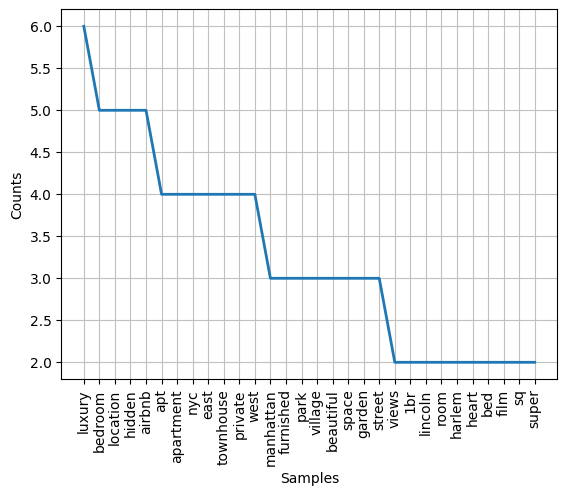

In [69]:
fdisk_nomes_filtrado.plot(30)

#### O padrão no texto do nome do local para lugares de mais alto valor:


```
[('luxury', 6),
 ('bedroom', 5),
 ('location', 5),
 ('hidden', 5),
 ('airbnb', 5),
 ('apt', 4),
 ('apartment', 4),
 ('nyc', 4),
 ('east', 4),
 ('townhouse', 4),
 ('private', 4),
 ('west', 4),
 ('manhattan', 3),
 ('furnished', 3),
 ('park', 3),
 ('village', 3),
 ('beautiful', 3),
 ('space', 3),
 ('garden', 3),
 ('street', 3),
 ('views', 2),
 ('1br', 2),
 ('lincoln', 2),
 ('room', 2),
 ('harlem', 2),
 ('heart', 2),
 ('bed', 2),
 ('film', 2),
 ('sq', 2),
 ('super', 2)]

```



In [70]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

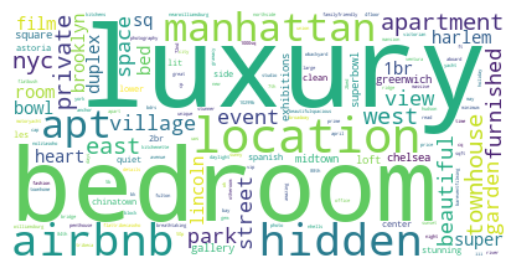

In [71]:
wordcloud = WordCloud(background_color="white").generate(nomes.to_string())
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

WordCloud trouxe uma nuvem de palvras mais frequentes, essas palavras são distinguidas pelo tamanho.

# Explique como você faria a previsão do preço a partir dos dados. Quais variáveis e/ou suas transformações você utilizou e por quê? Qual tipo de problema estamos resolvendo (regressão, classificação)? Qual modelo melhor se aproxima dos dados e quais seus prós e contras? Qual medida de performance do modelo foi escolhida e por quê?

## **Quais variáveis e/ou suas transformações você utilizou e por quê?**

   - **Variáveis numéricas:**
      - `latitude`, `longitude`: Mantivemos como estão, pois são coordenadas geográficas que podem influenciar o preço.
      - `minimo_noites`: Mantivemos, pois o mínimo de noites de reserva pode influenciar o preço.
      - `numero_de_reviews`: Mantivemos, pois um número maior de reviews pode indicar um local mais popular e, potencialmente, mais caro.
      - `reviews_por_mes`: Mantivemos, pois a taxa de reviews mensais pode indicar popularidade e, portanto, um preço diferente.
      - `calculado_host_listings_count`: Mantivemos, pois a quantidade de anúncios do mesmo anfitrião pode impactar a precificação.
      - `disponibilidade_365`: Mantivemos, pois a disponibilidade ao longo do ano pode influenciar o preço (locais mais disponíveis podem ter um preço diferente).
    
   - **Variáveis categóricas:**
      - `nome`: Utilizei LabelEncoder para transformar em variáveis numéricas,como foi visto anteriormente, há um certa influência na frequência de nomes que aparecem em locais com valores mais alto.
      - `bairro_group`:  Utilizei LabelEncoder para transformar em variáveis numéricas, pois cada grupo de bairro pode influenciar o preço.
      - `bairro`:  Utilizei LabelEncoder para transformar em variáveis numéricas, pois cada bairro pode influenciar o preço.
      - `room_type`: Utilizei LabelEncoder para transformar em variáveis numéricas, pois o tipo de quarto tem impacto no preço.

   - **Transformações:**
      - **LabelEncoder:** Aplicado nas variáveis categóricas `nome`,`bairro_group`,`bairro` para transformá-las em representações numéricas que os modelos de regressão podem entender.
      - **OneHotEncoder:** Aplicado na variável categórica `room_type` para transformá-las em representações numéricas que os modelos de regressão podem entender, pois o tipo de quarto influência no preço de acordo com o tipo.
      - **Remoção de colunas:** As colunas `host_name`, `host_id`, `id` foram removidas por não trazerem valor preditivo significativo ao modelo.

   - **Por que as transformações?**
      - Modelos de regressão geralmente funcionam com entradas numéricas. Transformamos as variáveis categóricas em numéricas para que o modelo possa usá-las no treinamento.  

In [72]:
df.head(5)

nome    host_name bairro_group  \
0                             Skylit Midtown Castle     Jennifer    Manhattan   
1               THE VILLAGE OF HARLEM....NEW YORK !    Elisabeth    Manhattan   
2                   Cozy Entire Floor of Brownstone  LisaRoxanne     Brooklyn   
3  Entire Apt: Spacious Studio/Loft by central park        Laura    Manhattan   
4         Large Cozy 1 BR Apartment In Midtown East        Chris    Manhattan   

         bairro  latitude  longitude        room_type  price  minimo_noites  \
0       Midtown  40.75362  -73.98377  Entire home/apt    225              1   
1        Harlem  40.80902  -73.94190     Private room    150              3   
2  Clinton Hill  40.68514  -73.95976  Entire home/apt     89              1   
3   East Harlem  40.79851  -73.94399  Entire home/apt     80             10   
4   Murray Hill  40.74767  -73.97500  Entire home/apt    200              3   

   numero_de_reviews                 ultima_review  reviews_por_mes  \
0                 45 2019-05-21 00:00:00.000000000         0.380000   
1                  0 2018-10-04 01:46:50.710055936         1.373251   
2                270 2019-07-05 00:00:00.000000000         4.640000   
3                  9 2018-11-19 00:00:00.000000000         0.100000   
4                 74 2019-06-22 00:00:00.000000000         0.590000   

   calculado_host_listings_count  disponibilidade_365  
0                              2                  355  
1                              1                  365  
2                              1                  194  
3                              1                    0  
4                              1                  129

In [73]:
df['nome'] = df['nome'].str.lower().str.replace(r'[^a-z0-9\s]', '', regex=True)

In [74]:
df['ultima_review'] = pd.to_datetime(df['ultima_review']).apply(lambda x: x.toordinal())

Dropando valores não interessantes

In [75]:
df.drop(columns=['host_name'], inplace=True)

Convertendo dados não numéricos (String) em números

In [76]:
from sklearn.preprocessing import LabelEncoder

LE=LabelEncoder()

categorias=['nome','bairro_group','bairro']
for label in categorias:
    df[label]=LE.fit_transform(df[label])

#### Convertendo dados não numéricos (String) em números com OneHotEncoder - pois os dados não podem receber pesos diferentes somente com a ordem alfabetica, pois o tipo de quarto influencia no preço.

In [77]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
room_type_encoder = ohe.fit_transform(df[['room_type']])
room_type_df = pd.DataFrame(room_type_encoder, columns=ohe.get_feature_names_out(['room_type']))
df = pd.concat([df.reset_index(drop=True), room_type_df.reset_index(drop=True)], axis=1)
df.drop('room_type', axis=1, inplace=True)

In [78]:
df.head(5)

nome  bairro_group  bairro  latitude  longitude  price  minimo_noites  \
0  37384             2     127  40.75362  -73.98377    225              1   
1  44373             2      94  40.80902  -73.94190    150              3   
2  15066             1      41  40.68514  -73.95976     89              1   
3  18550             2      61  40.79851  -73.94399     80             10   
4  24233             2     137  40.74767  -73.97500    200              3   

   numero_de_reviews  ultima_review  reviews_por_mes  \
0                 45         737200         0.380000   
1                  0         736971         1.373251   
2                270         737245         4.640000   
3                  9         737017         0.100000   
4                 74         737232         0.590000   

   calculado_host_listings_count  disponibilidade_365  \
0                              2                  355   
1                              1                  365   
2                              1                  194   
3                              1                    0   
4                              1                  129   

   room_type_Entire home/apt  room_type_Private room  room_type_Shared room  
0                        1.0                     0.0                    0.0  
1                        0.0                     1.0                    0.0  
2                        1.0                     0.0                    0.0  
3                        1.0                     0.0                    0.0  
4                        1.0                     0.0                    0.0

Correlação para ver as variaveis que afetam o preço

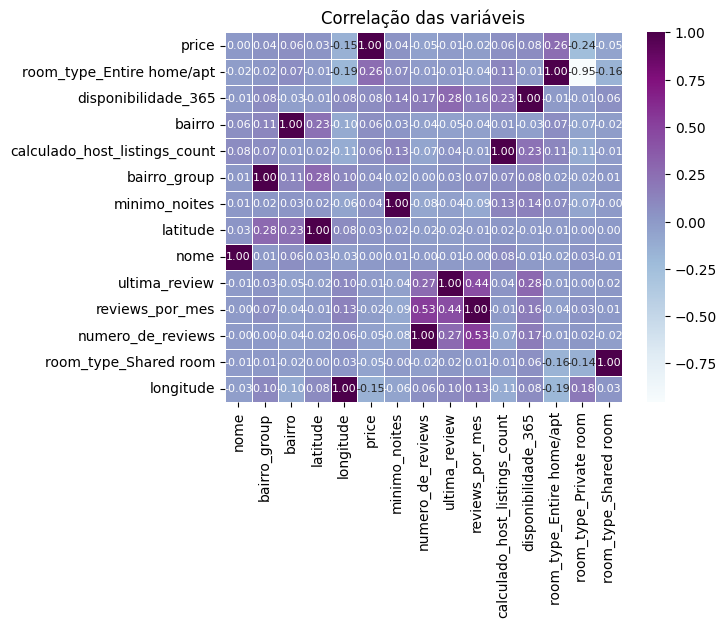

In [79]:
correlation=df.corr()
corr=correlation.nlargest(14,"price")
sns.heatmap(corr,annot=True,fmt=".2F",annot_kws={"size":8},linewidths=0.5,cmap='BuPu')
plt.title('Correlação das variáveis')
plt.show()

Todos tem correlação fraca, pois estão muito longe do valor 1

### Data spliting

In [80]:
X = df.drop('price', axis=1)
y = df['price']

X_shape= X.shape
y_shape= y.shape
print('Dimensão de x : ',X_shape)
print('Dimensão de y : ',y_shape)

Dimensão de x :  (48894, 14)
Dimensão de y :  (48894,)


In [81]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=32,shuffle=True)

In [82]:
x_train_shape=x_train.shape
x_test_shape=x_test.shape
y_train_shape=y_train.shape
y_test_shape=y_test.shape

print("x train dimensão :",x_train_shape)
print("x test dimensão: ",x_test_shape)
print("y train dimensão :",y_train_shape)
print("y test dimensão :",y_test_shape)

x train dimensão : (34225, 14)
x test dimensão:  (14669, 14)
y train dimensão : (34225,)
y test dimensão : (14669,)


## Qual tipo de problema estamos resolvendo (regressão, classificação)?

### Modelos - Dado que nosso objetivo é prever um valor contínuo (o preço), um modelo de regressão é o mais apropriado.

#### Regressão Linear

In [83]:
from sklearn.linear_model import LinearRegression
linearreg = LinearRegression().fit(x_train, y_train)

In [95]:
modelo_training_score=round(linearreg.score(x_train,y_train)*100,2)
modelo_testing_score=round(linearreg.score(x_test,y_test)*100,2)

print(f"Regressão Logística training score :",modelo_training_score)
print(f"Regressão Logística testing score :",modelo_testing_score)

Regressão Logística training score : 9.74
Regressão Logística testing score : 8.19


#### Logistic Regression

In [96]:
from sklearn.linear_model import LogisticRegression
reglog=LogisticRegression().fit(x_train,y_train)

c:\Users\krons\Documents\lighthouse\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [97]:
modelo_training_score=round(reglog.score(x_train,y_train)*100,2)
modelo_testing_score=round(reglog.score(x_test,y_test)*100,2)

print(f"LogisticRegression training score :",modelo_training_score)
print(f"LogisticRegression testing score :",modelo_testing_score)

LogisticRegression training score : 4.17
LogisticRegression testing score : 4.05


#### Random Florest Regression

In [158]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=3, random_state=0).fit(x_train,y_train)

In [159]:
modelo_training_score=round(regr.score(x_train,y_train)*100,2)
modelo_testing_score=round(regr.score(x_test,y_test)*100,2)

print(f"Random Florest Regression training score :",modelo_training_score)
print(f"Random Florest Regression testing score :",modelo_testing_score)

Random Florest Regression training score : 14.93
Random Florest Regression testing score : 9.06


### KNeighborsRegressor


In [92]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=2).fit(x_train,y_train)

In [163]:
modelo_training_score=round(neigh.score(x_train,y_train)*100,2)
modelo_testing_score=round(neigh.score(x_test,y_test)*100,2)

print(f"KNeighborsRegressor training score :",modelo_training_score)
print(f"KNeighborsRegressor testing score :",modelo_testing_score)

KNeighborsRegressor training score : 55.45
KNeighborsRegressor testing score : -28.64


### Qual modelo melhor se aproxima dos dados e quais seus prós e contras? 
Dentre os modelos, o Random Forest Regression teve o melhor resultado, mesmo com baixa precisão.

# Supondo um apartamento com as seguintes características:

```{'id': 2595,
 'nome': 'Skylit Midtown Castle',
 'host_id': 2845,
 'host_name': 'Jennifer',
 'bairro_group': 'Manhattan',
 'bairro': 'Midtown',
 'latitude': 40.75362,
 'longitude': -73.98377,
 'room_type': 'Entire home/apt',
 'minimo_noites': 1,
 'numero_de_reviews': 45,
 'ultima_review': '2019-05-21',
 'reviews_por_mes': 0.38,
 'calculado_host_listings_count': 2,
 'disponibilidade_365': 355}


In [127]:
#Características do imóvel para previsão
caracteristicas_imovel = [['Skylit Midtown Castle', 'Manhattan', 'Midtown', 40.75362, -73.98377, 'Entire home/apt', 1, 45, '2019-05-21', 0.38, 2, 355]]  
caracteristicas_df = pd.DataFrame(caracteristicas_imovel, columns=['nome', 'bairro_group', 'bairro', 'latitude', 'longitude', 'room_type', 'minimo_noites', 'numero_de_reviews', 'ultima_review', 'reviews_por_mes', 'calculado_host_listings_count', 'disponibilidade_365'])

Usando Label Encoder em 'nome', 'bairro_group', 'bairro', no dados do imovel que será aplicado o modelo.

In [128]:
for label in ['nome', 'bairro_group', 'bairro']:
    classes_conhec = LE.classes_.tolist() 
    nv_classes = list(set(caracteristicas_df[label]) - set(classes_conhec))
    if nv_classes: 
        LE.classes_ = np.append(LE.classes_, nv_classes)
    caracteristicas_df[label] = LE.transform(caracteristicas_df[label])

Aplicando OneHotEncoding em 'room_type'

In [129]:
room_type_encoded = ohe.transform(caracteristicas_df[['room_type']])
room_type_encoded_df = pd.DataFrame(room_type_encoded, columns=ohe.get_feature_names_out(['room_type']))
caracteristicas_df = pd.concat([caracteristicas_df, room_type_encoded_df], axis=1)
caracteristicas_df.drop('room_type', axis=1, inplace=True)

Convertendo 'ultima_review' para ordinal

In [130]:
caracteristicas_df['ultima_review'] = pd.to_datetime(caracteristicas_df['ultima_review']).apply(lambda x: x.toordinal())

In [ ]:
# Random Florest Regression
previsao = regr.predict(caracteristicas_df)
previsao_arredondada = round(previsao[0], 2)
print(f"Preço previsto pelo modelo de Random Forest Classifer do imóvel: {previsao_arredondada}")

Preço previsto pelo modelo de Random Forest Classifer do imóvel: 243.15


#### Random Forest, dentre os modelos, esse ficou mais preciso. Então eu recomendaria o valor de $ 243.15.

# Salve o modelo desenvolvido no formato .pkl. 

Irei salvar o modelo de Random Forest, dentre os modelos, esse ficou mais preciso.

In [164]:
import pickle

with open('randomforestregression.pkl', 'wb') as arq:
    pickle.dump(regr, arq)